In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


#img = cv2.imread("5.1.14.tiff")
img = cv2.imread("2.1.01.tiff")
#img = cv2.imread("2.1.02.tiff")

#gain = 10
#cutoff = 0.5
newimg = np.copy(img)

#newimg[:,:,0] = img[:,:,0]
#newimg[:,:,1] = img[:,:,1]
#newimg[:,:,2] = img[:,:,2]

Lmin = newimg.min()
Lmax = newimg.max()

newimg = (newimg - Lmin)/(Lmax - Lmin)
mean = np.mean(newimg)

beta = 1.0
alpha = ((np.log(mean/255))/np.log(mean))* (beta**(np.log(mean)))

L = np.log(newimg)

newimg = 255 * (newimg ** (alpha * (beta ** (-L))))
cv2.imwrite('Enhanced.tiff', newimg)

cv2.imshow('input_image',img)
plt.show()
cv2.imshow('Reconstructed_image',newimg)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-4-e0ef9128ec99>:27: RuntimeWarning: divide by zero encountered in log
  L = np.log(newimg)


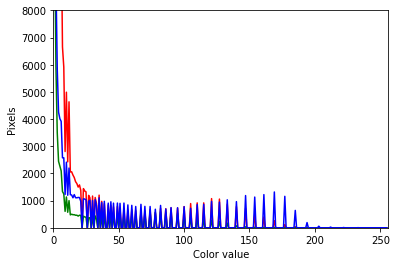

In [11]:
#Enhanced Image

newimg1 = np.copy(newimg)

colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
plt.ylim([0, 8000])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        newimg1[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

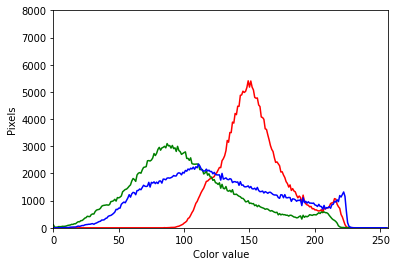

In [12]:
#Original image

newimg2 = np.copy(img)

colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
plt.ylim([0, 8000])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        newimg2[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [52]:
#Discrete cross entropy loss

p = (0, 256)
c_e = -sum([p[hik] * np.log2(p[hik]) for hik in range(len(p))]) + sum([p[h0k] * np.log2(p[h0k]) for h0k in range(len(p))])

print(c_e)

nan


<ipython-input-52-3fe63f49d099>:4: RuntimeWarning: divide by zero encountered in log2
  c_e = -sum([p[hik] * np.log2(p[hik]) for hik in range(len(p))])
<ipython-input-52-3fe63f49d099>:4: RuntimeWarning: invalid value encountered in double_scalars
  c_e = -sum([p[hik] * np.log2(p[hik]) for hik in range(len(p))])
